<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

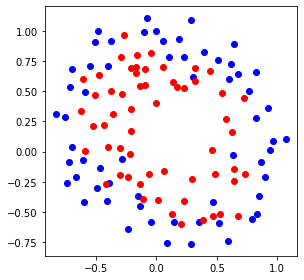

[1, 0.8855386559602794, 0.7786656381898749, 0.6794935411479928, 0.5880146211125266, 0.5041086414844091, 0.4275570040977564, 0.358060866994635, 0.29526088191544253, 0.23875653377574696, 0.18812363702677026, 0.14292915570916648, 0.10274303922144064, 0.06714714691465877, 0.03574156744342784, 0.008148749170610118, -0.015984118201507382, -0.03698405941721649, -0.05515225079188934, -0.07076464658825167, -0.08407306470088453, -0.09530655664909854, -0.1046729326392668, -0.11236034899939573, -0.11853889355229903, -0.12336212579810273, -0.12696854448168102, -0.12948296645990928, -0.13101780880025754, -0.13167427157866302, -0.13154342256012144, -0.13070718734419795, -0.12923925001834263, -0.12720587016479504, -0.1246666224168693, -0.12167506480565597, -0.11827934198455115, -0.11452272914140825, -0.11044412205877692, -0.10607847839759572, -0.10145721488310872, -0.09660856467964116, -0.09155789886330372, -0.08632801554475214, -0.08093939986104211, -0.07541045774774265, -0.06975772611989564, -0.0639

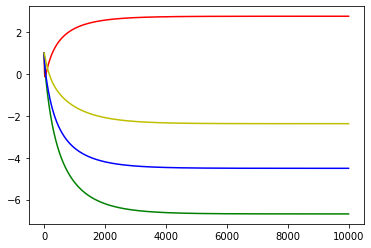

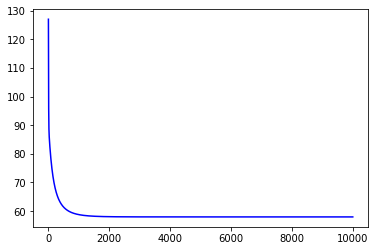

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

data = np.genfromtxt('data-nonlinear.txt', delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Definitions of z, sigma, objective function, weight, high dimensional function
def z(theta,X):
  return g(theta,X)

def sigma(z):
  return 1/(1+np.exp(-z))

def J(l,z):
  sum = 0
  for i in range(len(l)):
    sum = sum + l[i]*(-np.log(sigma(z[i])))+(1-l[i])*(-np.log(1-sigma(z[i])))
  return sum

def J_prime(_z,_l,_xi):
    return (sigma(_z)-_l)*_xi


def GD_algoritm(theta,z,l,X,alpha):
  for i in range(len(l)):
    theta[0] = theta[0] - alpha*w(z[i],l[i],X[0][i])
    theta[1] = theta[1] - alpha*w(z[i],l[i],X[1][i]*X[1][i])
    theta[2] = theta[2] - alpha*w(z[i],l[i],X[2][i]*X[2][i])
    theta[3] = theta[3] - alpha*w(z[i],l[i],X[1][i]*X[2][i])
  return theta

def w(z,l,xi):
  return J_prime(z,l,xi)

def g(theta, X):
  z = X[0]*theta[0] + X[1]*X[1]*theta[1] + X[2]*X[2]*theta[2] + X[1]*X[2]*theta[3] 
  return z

### Basic Settings
pointC = np.ones(len(pointX))
X = [pointC,pointX,pointY]
l=label
theta0 = 1
theta1 = 1
theta2 = 1
theta3 = 1
theta = [theta0,theta1,theta2,theta3]
err_theta0 = []
err_theta1 = []
err_theta2 = []
err_theta3 = []
err_J = []
alpha = 3*1e-3 #learning rate

### Plot the training error
## iteration of gradient decent until convergence
for _ in range(10000):
  zet = z(theta,X)
  J_val = J(l,zet)
  err_J.append(J_val)
  err_theta0.append(theta[0])
  err_theta1.append(theta[1])
  err_theta2.append(theta[2])
  err_theta3.append(theta[3])
  theta = GD_algoritm(theta,zet,l,X,alpha)

print(err_theta0)

plt.plot(err_theta0,color='r')
plt.plot(err_theta1,color='g')
plt.plot(err_theta2,color='b')
plt.plot(err_theta3,color='y')
plt.show()

plt.plot(err_J,color='b')
plt.show()